In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # this increases width to full screen

In [2]:
import os
import numpy as np # import numerical python
import pandas as pd # import pandas
import scipy as sp
import xarray as xr # import xarray
import struct # import for importing binary
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.special import erf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib import cm
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
sys.path.append("/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Code/Python/CommonFunctions") 
import GaussExp_Distribution
import MVChangePoint
import DHOF_Distribution
import DHOA_Distribution
from PlottingFunctions import Plotter
plots = Plotter(poster=True)
GED = GaussExp_Distribution.gaussexp_dist
MVCP = MVChangePoint.MVCP()

In [231]:
tau1 = 10
tau2 = 10
tau3 = 20
amps = 1

A = 300
B = 1
sigma = 0.1

mydist_1 = GED(tau1, amps, sigma)
mydist_2 = GED(tau2, amps, sigma)
mydist_3 = GED(tau3, amps, sigma)

nsignal = int(A/3)
CPL = A/3

data = np.zeros([A, B])
for i in np.arange(B):
    signal_1 = (mydist_1.rvs(size=(nsignal))) # get signal
    signal_2 = (mydist_2.rvs(size=(nsignal))) # get signal
    signal_3 = (mydist_3.rvs(size=(nsignal))) # get signal
    data[:, i] = np.hstack([signal_1, signal_2, signal_3])


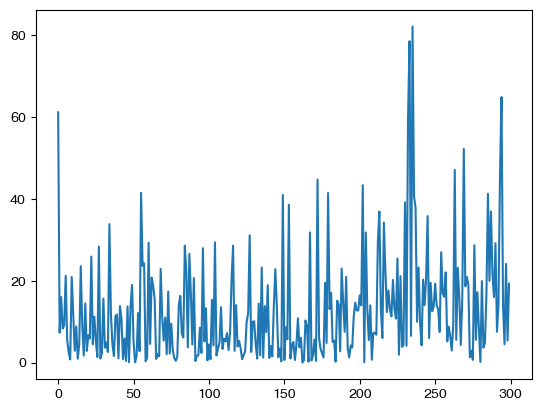

In [232]:
plt.plot(data)

In [245]:
data = data[:t[tau_k], :]

In [246]:
t = np.arange(2, len(data)-2)
Q = MVCP.EmpiricalDivergence(data, t)

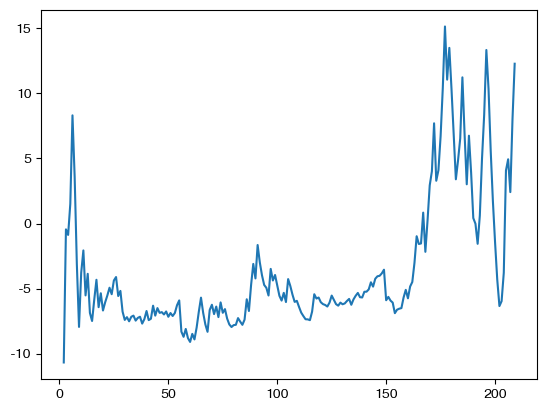

In [247]:
plt.plot(t, Q)

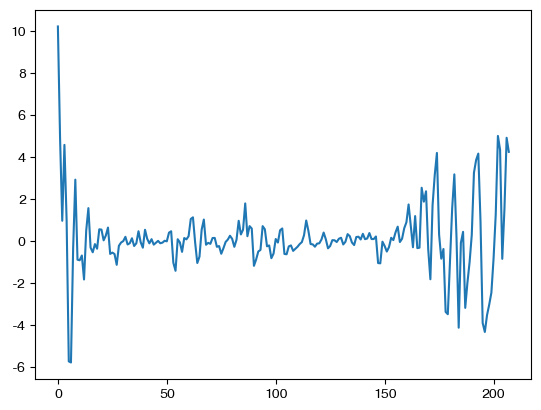

In [248]:
#grad = np.gradient(sp.signal.savgol_filter(Q, 10, polyorder=1))
grad = np.gradient(Q)
plt.plot(grad)

In [249]:
np.sum(grad[:np.argmax(Q)])

28.572066905583377

In [250]:
np.sum(grad[np.argmax(Q):])

1.6343853782777238

In [251]:
tau_k = np.argmax(Q)
print(t[tau_k])

177


In [252]:
R = 1000
alpha=1
R_new = R
tests = np.zeros(R) # initialise test matrix
arr = np.zeros([R, len(data)]) + np.arange(len(data)) # generate array of locations
permuted = np.array(arr[np.arange(len(arr))[:,None], 
            np.random.randn(*arr.shape).argsort(axis=1)], dtype=int) # permute locations
for i in np.arange(R): # for every permutation of the data
    data_p = data[permuted[i, :], :] # get permuted data
    Q_p = MVCP.EmpiricalDivergence(data_p, tau_k, alpha) # test Q at tau_k location
    tests[i] = Q_p # put Q_p into test matrix

In [253]:
np.max(Q)

15.142420258634493

In [254]:
p_test = np.divide(len(tests[tests >= np.max(Q)]), np.add(R, 1.)) # generate p value
sig = np.multiply(p_test < 0.01, 1)
print(sig)

0


In [255]:
np.mean(tests)+4*(np.std(tests))

38.66090710172171

In [256]:
np.percentile(tests, q=100)

70.01177167924116

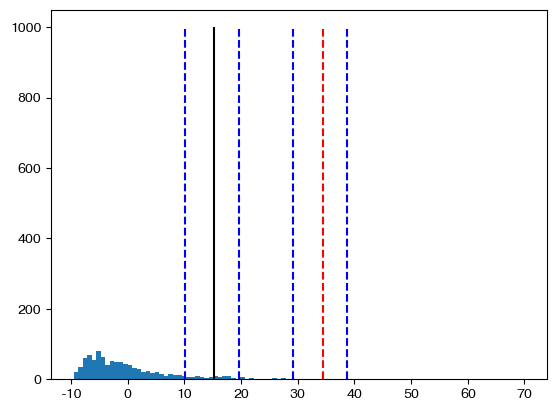

In [257]:
plt.hist(tests, 100);
plt.vlines(x=np.mean(tests)+1*(np.std(tests)), ymin=0, ymax=1000, color='b', ls='--');
plt.vlines(x=np.mean(tests)+2*(np.std(tests)), ymin=0, ymax=1000, color='b', ls='--');
plt.vlines(x=np.mean(tests)+3*(np.std(tests)), ymin=0, ymax=1000, color='b', ls='--');
plt.vlines(x=np.mean(tests)+4*(np.std(tests)), ymin=0, ymax=1000, color='b', ls='--');
plt.vlines(x=np.percentile(tests, q=99), ymin=0, ymax=1000, color='r', ls='--');


plt.vlines(x=np.max(Q), ymin=0, ymax=1000, color='k');
plt.show(block=False)

In [ ]:
fig, axs = plots.two_column_plot(height=3)

axs = plots.line_plot(axs=axs, x=np.arange(0, len(data)), y=data, xaxislabel='time step', yaxislabel=r'displacement/$\mu$m')

axs.vlines(x=250, ymin=-1, ymax=1, ls='--', color='k', lw=2)
axs.set_ylim([-1, 1])

plt.tight_layout()
plt.savefig('20231204_ChangePointConcept.svg', transparent=True, dpi=600)

In [ ]:
fig, axs = plots.two_column_plot(height=3)

axs = plots.line_plot(axs=axs, x=np.arange(0, 250), y=data[:250], color='darkred', xaxislabel='time step', yaxislabel=r'displacement/$\mu$m')
axs = plots.line_plot(axs=axs, x=np.arange(250, len(data)), y=data[250:], color='darkblue', xaxislabel='time step', yaxislabel=r'displacement/$\mu$m')

axs.vlines(x=250, ymin=-1, ymax=1, ls='--', color='k', lw=2)


ax2 = axs.twiny()

new_tick_locations = np.array([0, 250, 500])

ax2.set_xlim(axs.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels([r'$i$', r'$n$, $j$', r'$m$'])

axs.set_ylim([-1, 1])
axs.set_xlim([0, 500])
plt.tight_layout()
plt.savefig('20231204_ChangePointConcept_UStats.svg', transparent=True, dpi=600)

In [15]:
data = data[:, 0]

In [16]:
CPlist = MVCP.NPCP_EDivisive(data)
print(CPlist)

[[2.500000e+02 0.000000e+00]
 [4.610000e+02 7.996002e-03]]


In [17]:
CPlist[:, 0]

array([250., 461.])

In [ ]:
S = 1.25
nu0 = 20
sigma1 = 0.2
omega = 0.4
sigma2list = np.logspace(np.log10(sigma1/4.), np.log10(sigma1*4), 100)
ntests = 1000
A = 500
B = 100
nsignal = int(A/2)
CPL = A/2

for sigma2 in sigma2list:
    DHO_1 = DHOF_Distribution.DHOF_dist(S, nu0, sigma1, omega)
    DHO_2 = DHOF_Distribution.DHOF_dist(S, nu0, sigma2, omega)

    data_dho = np.zeros([A, B, ntests])
    for i in np.arange(B):
        signal_1 = (DHO_1.rvs(size=(nsignal, ntests))) # get signal
        signal_2 = (DHO_2.rvs(size=(nsignal, ntests))) # get signal
        data_dho[:, i, :] = np.vstack([signal_1, signal_2])
 
    data_wavelength = 1e4/data_dho
    bins = np.linspace(480, 600, 51)
    data_wavelength_spec = np.zeros([A, len(bins)-1, ntests])
    for test in np.arange(ntests):
        for i in np.arange(A):
            data_wavelength_spec[i, :, test] = np.histogram(data_wavelength[i, :, test], bins=bins)[0]    

    print('spectra simulated')
    for test in np.arange(ntests):
        CP_list = MVCP.NPCP_EDivisive(data_wavelength_spec[:, :, test])
        if test == 0:
            overallCPlist = CP_list
        else:
            overallCPlist = np.vstack([overallCPlist, CP_list])
        if test % 50 == 0:
            print(str(test)+' of '+str(ntests)+', from sigma '+str(np.around(sigma2, 2))+' done.')
    oCP_tosave = pd.DataFrame(data=overallCPlist, columns=['CP_location', 'Significance'])
    sigmatosave = str(np.around(sigma2, 2)).replace('.', 'p')
    oCP_tosave.to_csv('Testing_Spectrum/20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_'+sigmatosave+'kK.csv')
    pd.DataFrame(data=np.full(ntests, CPL), columns=['TPs']).to_csv('Testing_Spectrum/20231204_TruePositives_Sigma1_0p2kK_Sigma2_'+sigmatosave+'kK.csv')

spectra simulated
0 of 1000, from sigma 0.05 done.
50 of 1000, from sigma 0.05 done.
100 of 1000, from sigma 0.05 done.
150 of 1000, from sigma 0.05 done.
200 of 1000, from sigma 0.05 done.
250 of 1000, from sigma 0.05 done.
300 of 1000, from sigma 0.05 done.
350 of 1000, from sigma 0.05 done.
400 of 1000, from sigma 0.05 done.
450 of 1000, from sigma 0.05 done.
500 of 1000, from sigma 0.05 done.
550 of 1000, from sigma 0.05 done.
600 of 1000, from sigma 0.05 done.
650 of 1000, from sigma 0.05 done.
700 of 1000, from sigma 0.05 done.
750 of 1000, from sigma 0.05 done.
800 of 1000, from sigma 0.05 done.
850 of 1000, from sigma 0.05 done.
900 of 1000, from sigma 0.05 done.
950 of 1000, from sigma 0.05 done.
spectra simulated
0 of 1000, from sigma 0.05 done.
50 of 1000, from sigma 0.05 done.
100 of 1000, from sigma 0.05 done.
150 of 1000, from sigma 0.05 done.
200 of 1000, from sigma 0.05 done.
250 of 1000, from sigma 0.05 done.
300 of 1000, from sigma 0.05 done.
350 of 1000, from sigma 0

In [ ]:
tau1 = 10
A = 500
B = 1
amps = 1
sigma = 0.1

tau2list = np.logspace(np.log10(tau1/10.), np.log10(tau1*10), 100)
ntests = 1000

for tau2 in tau2list:
    
    mydist_1 = GED(tau1, amps, sigma)
    mydist_2 = GED(tau2, amps, sigma)
    nsignal = int(A/2)
    CPL = A/2
    data = np.zeros([A, B, ntests])
    for i in np.arange(B):
        signal_1 = (mydist_1.rvs(size=(nsignal, ntests))) # get signal
        signal_2 = (mydist_2.rvs(size=(nsignal, ntests))) # get signal
        data[:, i, :] = np.vstack([signal_1, signal_2])
    
    for test in np.arange(ntests):
        test_data = data[:, test, :]
        CP_list = MVCP.NPCP_EDivisive(test_data)
        if test == 0:
            overallCPlist = CP_list
        else:
            overallCPlist = np.vstack([overallCPlist, CP_list])
        if test % 50 == 0:
            print(str(test)+' of '+str(ntests)+', from tau '+str(np.around(tau2, 2))+' done.')
    oCP_tosave = pd.DataFrame(data=overallCPlist, columns=['CP_location', 'Significance'])
    tautosave = str(np.around(tau2, 2)).replace('.', 'p')
    oCP_tosave.to_csv('Testing_Lifetime/20231204_TauTesting_Tau1_10ns_Tau2_'+tautosave+'ns.csv')
    pd.DataFrame(data=np.full(ntests, CPL), columns=['TPs']).to_csv('Testing_Lifetime/20231204_TruePositives_Tau1_10ns_Tau2_'+tautosave+'ns.csv')

In [ ]:
fig, axs = plots.two_column_plot(ncolumns=2, widthratio=[1,1], height=3)

lwg=0.25

axs[0] = plots.line_plot(axs[0], np.arange(0, len(data)), np.mean(data, axis=1), xaxislabel='laser pulse', yaxislabel='photon arrival time')
axs[1] = plots.line_plot(axs[1], t, Q, xaxislabel='laser pulse', yaxislabel='data difference metric')

#axs[0].plot(t, Q, color='k', lw=1, label='Q metric')
axs[1].vlines(t[np.argmax(Q)], 0, np.nanmax(Q)*2, lw=0.75, color='r', label=r'argmax($\hat{\mathsf{Q}}$)')
axs[1].vlines(CPL, 0, np.nanmax(Q)*2, lw=1, ls='--', color='k', label='true CP location')
axs[1].legend(loc='upper left', frameon=False)
axs[1].set_xlim([np.nanmin(t), np.nanmax(t)])
axs[1].set_ylim([0, np.nanmax(Q)+(0.05*np.nanmax(Q))])
axs[0].grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)  

#axs[1].plot(np.arange(0, len(data)), np.mean(data, axis=1), color='k', lw=1)
axs[0].vlines(CPL, 0, np.nanmax(Q)*2, lw=1, ls='--', color='k', label='true CP location')
axs[0].hlines(tau1, xmin=0, xmax=len(data)/2, color='r', lw=1.25)
axs[0].hlines(tau2, xmin=len(data)/2, xmax=len(data), color='r', lw=1.25)

axs[0].set_xlim([0, len(data)])
axs[0].set_ylim([np.min(data), np.max(np.mean(data, axis=1))*1.1])
axs[1].grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)
plt.tight_layout()
plt.savefig('20231124_ChangePoint_Lifetime.svg', transparent=True, dpi=600)

In [ ]:
x = np.linspace(17, 22, 10000)
y = DHO_1.fluordispharmonic(x)

x = 1e4/x
fig, axs = plots.one_column_plot()
axs = plots.line_plot(axs, x, y, xaxislabel='wavelength/nm', yaxislabel='fluorescence', label='unstructured')


x = np.linspace(17, 22, 10000)
y = DHO_2.fluordispharmonic(x)

x = 1e4/x

axs = plots.line_plot(axs, x, y, xaxislabel='wavelength/nm', yaxislabel='fluorescence', label='structured', ls='--')
axs.set_ylim([0, 1.5])
plt.legend(loc='best')

plt.savefig('20231124_Fluo.svg', transparent=False, dpi=600)

In [ ]:
A = 500
B = 100

nsignal = int(A/2)
CPL = A/2


data_dho = np.zeros([A, B])
for i in np.arange(B):
    signal_1 = (DHO_1.rvs(size=nsignal)) # get signal
    signal_2 = (DHO_2.rvs(size=nsignal)) # get signal
    d = np.hstack([signal_1, signal_2])
    data_dho[:, i] = np.hstack([signal_1, signal_2])

In [ ]:
data_wavelength = 1e4/data_dho

In [ ]:
data_wavelength.shape

In [ ]:
bins = np.linspace(480, 582, 51)

In [ ]:
data_wavelength_spec = np.zeros([A, len(bins)-1])
for i in np.arange(A):
    data_wavelength_spec[i, :] = np.histogram(data_wavelength[i, :], bins=bins)[0]

In [ ]:
plt.plot(bins[:-1], data_wavelength_spec[300, :])

In [ ]:
alpha = 1
t = np.arange(2, len(data_wavelength_spec)-2)
Q_wavelength = MVCP.EmpiricalDivergence(data_wavelength_spec, t, alpha)

In [ ]:
fig, axs = plots.two_column_plot(ncolumns=2, widthratio=[1,1], height=3)

lwg=0.25

x = bins[:-1]
y = np.arange(0, 500)

xv, yv = np.meshgrid(y, x, indexing='ij')
z = data_wavelength_spec
axs[0].contourf(xv,yv,z)

for c in axs[0].collections:
    c.set_edgecolor("face")
axs[1] = plots.line_plot(axs[1], t, Q_wavelength, xaxislabel='time point', yaxislabel='data difference metric')

#axs[0].plot(t, Q, color='k', lw=1, label='Q metric')
axs[1].vlines(t[np.argmax(Q_wavelength)], 0, np.nanmax(Q_wavelength)*2, lw=0.75, color='r', label=r'argmax($\hat{\mathsf{Q}}$)')
axs[1].vlines(CPL, 0, np.nanmax(Q_wavelength)*2, lw=1, ls='--', color='k', label='true CP location')
axs[1].legend(loc='upper left', frameon=False)
axs[1].set_xlim([np.nanmin(t), np.nanmax(t)])
axs[1].set_ylim([0, np.nanmax(Q_wavelength)+(0.05*np.nanmax(Q_wavelength))])

#axs[1].plot(np.arange(0, len(data)), np.mean(data, axis=1), color='k', lw=1)
axs[0].vlines(CPL, 0, np.nanmax(Q_wavelength)*2, lw=1, ls='--', color='k', label='true CP location')
axs[0].hlines(np.mean(data_wavelength[:250, :]), xmin=0, xmax=len(data)/2, color='r', lw=1.25)
axs[0].hlines(np.mean(data_wavelength[250:, :]), xmin=len(data)/2, xmax=len(data), color='r', lw=1.25)

axs[0].set_xlabel('time point', fontsize=8)
axs[0].set_ylabel('wavelength', fontsize=8)
axs[0].set_xlim([0, len(data)])
axs[0].set_ylim([np.min(yv), np.max(np.mean(yv, axis=1))])
axs[1].grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)
plt.tight_layout()
plt.savefig('20231124_ChangePoint_Spectrum.svg', transparent=True, dpi=600)

In [ ]:
plt.contourf(xv,yv,z)

In [ ]:
def bhattacharyya_distance(x, distribution1, distribution2):
    """ Estimate Bhattacharyya Distance (between General Distributions)
    
    Args:
        distribution1: a sample distribution 1
        distribution2: a sample distribution 2
    
    Returns:
        Bhattacharyya distance
    """
    DB = np.trapz(np.sqrt(distribution1*distribution2), x=x)
    BD = -np.log(DB)
    if BD < 0:
        BD = 0
    return BD

In [ ]:
def exppdf(x, lambda_val):
     # exp function
     # outputs normalised exp lambda*exp(-lambda*x)
     # ================INPUTS============= 
     # x ix data points to evaluate pdf
     # lambda_val is exponential rate parameter
     # ================OUTPUT============= 
     # pdf, simulated signal
    pdf = np.multiply(lambda_val, np.exp(np.multiply(-lambda_val, x))) # make exponential pdf
    return pdf # return the exponential pdf

In [ ]:
def gauss(x, sigma, mu):
     # gauss function
     # outputs normalised gaussian (1/(sqrt(2*pi)*sigma))*(exp(-0.5*((x-mu)^2 / sigma^2)))
     # ================INPUTS============= 
     # x ix data points to evaluate pdf
     # sigma is sigma of gaussian
     # mu is centre of gaussian
     # ================OUTPUT============= 
     # pdf, simulated signal
    prefactor = np.divide(1., np.multiply(sigma, np.sqrt(np.multiply(2., np.pi)))) # get normalisation prefactor
    expterm = np.exp(np.multiply(-0.5, np.divide(np.square(np.subtract(x, mu)), np.square(sigma)))) # get exponential term
    pdf = np.multiply(prefactor, expterm) # make gaussian pdf
    return pdf # return the gaussian pdf

In [ ]:
def expgauss(x, tau, sigma):
    # expgauss function
    # outputs normalised sum-of-exponentials convolved with gaussians 
    # ================INPUTS============= 
    # x ix data points to evaluate pdf
    # tau is one lifetime
    # sigma is sigma of gaussian to convolve with exponential
    # ================OUTPUT============= 
    # simulated signal
    ksm = np.tile(np.divide(1., tau), (1, 1))  # make matrix of ks
    erfterm = 1. + erf(np.divide(np.subtract(x, np.multiply(ksm.T, np.square(sigma))), np.sqrt(2)*sigma))
    gaussterm = np.exp(np.divide(np.multiply(np.square(ksm.T), np.square(sigma)), 2.))
    return np.nansum(np.multiply(np.divide(np.multiply(1., ksm), 2.).T, np.multiply(np.multiply(np.exp(np.multiply(-ksm.T, x)), gaussterm), erfterm)), axis=0)

In [ ]:
e_duration1 = np.random.exponential(scale=0.39, size=100000) # 0.39 and 0.25 are lifetime blinking time constants
e_duration2 = np.random.exponential(scale=0.25, size=100000)
plt.hist(e_duration1, 100, alpha=0.7, density=True); plt.hist(e_duration2, 100, alpha=0.7, density=True); plt.show(block=False)

In [ ]:
x = np.linspace(-2, 200, 100000);
P = expgauss(x, 39, 0.3)
Q = expgauss(x, 19, 0.3)
plt.plot(x, P)
plt.plot(x, Q)
plt.yscale('log')
plt.ylim([1e-3, 0.06])
print(bhattacharyya_distance(x, P, Q))

In [ ]:
BDists = np.zeros(100)

x = np.logspace(np.log10(1e-3), np.log10(100), 100000);
for i in enumerate(np.arange(2, 102)):
    Q = exppdf(x, 1./i[1])
    BDists[i[0]] = bhattacharyya_distance(x, P, Q)


In [ ]:
plt.plot(BDists, label='Exponential')
plt.plot(BDists_Gauss, label='Gaussian')
plt.ylabel('Bhattacharyya distance')
plt.yscale('log')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
x2 = np.linspace(-10, 20, 100000)
P2 = gauss(x2, 1, 1)
Q2 = gauss(x2, 1, 2)
plt.plot(x2, P2)
plt.plot(x2, Q2)

BD = bhattacharyya_distance(x2, P2, Q2)
print(BD)

In [ ]:
BDists_Gauss = np.zeros(100)

for i in enumerate(np.arange(1, 101)):
    BDists_Gauss[i[0]] = 0.25*(((0-i[1])**2)/(1**2 + 1**2)) + 0.5*np.log((1**2 + 1**2)/(2*1*1))


In [ ]:
wavenumbers = np.linspace(10, 30, 100000)
S = 2
nu0 = 20
sigma = 0.5
omega = 1

In [ ]:
DHDF = DHOF_Distribution.DHOF_dist(S, nu0, sigma, omega)
DHDF_2 = DHOF_Distribution.DHOF_dist(S, nu0, sigma, omega+0.5)

DHDA = DHOA_Distribution.DHOA_dist(S, nu0, sigma, omega)

In [ ]:
wavenumbers = np.linspace(10, 30, 2000)

plt.hist(DHDF.rvs(size=200), bins=wavenumbers, color='red', alpha=0.5, density=True);
plt.plot(wavenumbers, DHDF.pdf(wavenumbers), color='red');
plt.hist(DHDF_2.rvs(size=200), bins=wavenumbers, color='blue', alpha=0.5, density=True);
plt.plot(wavenumbers, DHDF_2.pdf(wavenumbers), color='blue');
plt.show(block=False)

In [ ]:
A = 200
B = 2
mydist_1 = DHDF
mydist_2 = DHDF_2
nsignal = int(A/2)
CPL = A/2


data = np.zeros([A, B])
for i in np.arange(A):
    if i < CPL:
        data[i, :] = np.sort(DHDF.rvs(size=B))
    else:
        data[i, :] = np.sort(DHDF_2.rvs(size=B))

In [ ]:
alpha = 1
t = np.arange(2, len(data)-2)
Q = MVCP.EmpiricalDivergence(data, t, alpha)

In [ ]:
plt.rcParams['figure.figsize'] = [8, 3.5]
plt.rcParams['font.size'] = 9


fig, axs= plt.subplots(1, 2)
lwg=0.25
axs[0].plot(t, Q, color='k', lw=1, label='Q metric')
axs[0].vlines(t[np.argmax(Q)], 0, np.nanmax(Q)*2, lw=0.75, color='r', label=r'argmax($\hat{\mathsf{Q}}$)')
axs[0].vlines(CPL, 0, np.nanmax(Q)*2, lw=1, ls='--', color='k', label='true CP location')
axs[0].legend(loc='upper left', frameon=False)
axs[0].set_xlabel('time step')
axs[0].set_ylabel(r'$\hat{\mathsf{Q}}$')
axs[0].set_xlim([np.nanmin(t), np.nanmax(t)])
axs[0].set_ylim([0, np.nanmax(Q)+(0.05*np.nanmax(Q))])
axs[0].grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)  

axs[1].plot(np.arange(0, len(data)), np.std(data, axis=1), color='k', lw=1)
axs[1].vlines(CPL, 0, np.nanmax(Q)*2, lw=1, ls='--', color='k', label='true CP location')
axs[1].hlines(sigma, xmin=0, xmax=len(data)/2, color='r', lw=1.25)
axs[1].hlines(sigma+0.5, xmin=len(data)/2, xmax=len(data), color='r', lw=1.25)

axs[1].set_xlabel('time step')
axs[1].set_ylabel(r'$\sigma$ of '+str(A)+' by '+str(B)+' matrix')
axs[1].set_xlim([0, len(data)])
axs[1].set_ylim([np.min(np.std(data, axis=1)), np.max(np.std(data, axis=1))*1.1])
axs[1].grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)
plt.tight_layout()

In [ ]:
x = np.logspace(-3, 1.5, 10000)
y = (0.39)*np.exp(-0.39*x)
plt.plot(x,y)
yh = np.random.exponential(1./0.39, 1000)
plt.hist(yh, bins=100, alpha=0.5, density=True)
plt.ylim(1e-3, 0.5)
plt.xscale('log');plt.yscale('log');
plt.grid(alpha=0.25, ls='--', lw=0.5)
plt.xlim(1e-3, np.power(10, 1.5))
plt.show()